# Options Trading Strategies

In [1]:
import numpy as np 
import matplotlib.pyplot as plt

import seaborn as sns
sns.set()
sns.set_style('white')

## Bull Call Spreads

### Function for plotting Stock Price and P/L

In [ ]:
def pl_plot_bcs(ITM_sp,OTM_sp,qty_opts,net_debit,max_profit,b_even):

    #Creating array of x values (stock prices)
    dx = 100    
    x = np.linspace(ITM_sp - 2.00, OTM_sp + 2.00, dx)
    
    #Piecewise function y(x) calculated as 
    y = np.piecewise(x, [x <= ITM_sp, (x > ITM_sp) * (x < OTM_sp), x >= OTM_sp], 
                    [net_debit, lambda x: (100 * qty_opts * (x - ITM_sp)) + net_debit,max_profit])
    
    #Creating array of xtick labels 
    space = 2
    start = ITM_sp - space
    stop = OTM_sp + space
    step = .5 
    x_list = []

    while start <= stop: 
        x_list.append(start)
        start = round(start + step,1)
    x_list.append(round(b_even,2))
    
    #Creating figure of the plot
    fig = plt.figure(figsize = (10,5))
    
    #Making axis a subplot and moving it to the 0 position
    ax = fig.add_subplot(1, 1, 1)
    ax.spines['bottom'].set_position('zero')
    
    #Setting y_axis limit
    if (abs(net_debit) > abs(max_profit)):
        ax.set_ylim([1.1 * net_debit, max_profit - (net_debit * .1)])
    else:
        ax.set_ylim([net_debit - (.1 * max_profit), 1.1 * max_profit])
    
    #Labelling and creating xticks
    plt.xticks(x_list,x_list)
    
    #Labelling and creating yticks
    plt.yticks([0, net_debit, max_profit], [0, round(net_debit,2), round(max_profit,2)])
    
    #Plotting x,y and setting style
    plt.plot(x,y)
    
    #Creating axis to replace the moved one from the bottom
    ax2 = ax.twiny()
    ax2.set_xticks([])
    
    #Displaying plot
    plt.show()

### Function for the Bull Call Spread

In [ ]:
#In this strategy we BUY ITM CALL(s) and SELL OTM CALL(s)
def bcspread():
    
    #User inputs strike price, qty of options, and premiums
    qty_opts = int(input("How many options are you buying? "))

    OTM_sp = float(input("Enter the strike price of the OTM CALL (higher strike): "))
    ITM_sp = float(input("Enter the strike price of the ITM CALL (lower strike): "))

    OTM_pr = float(input("Enter the BID of the OTM CALL (higher strike): "))
    ITM_pr = float(input("Enter the ASK of the ITM CALL (lower strike): "))

    #TEST VALUES
#     qty_opts = 100
#     OTM_sp = 12
#     ITM_sp = 11.5
#     OTM_pr = .33
#     ITM_pr = .66

    #Calculating and displaying key values
    net_debit = (-100 * qty_opts * (ITM_pr - OTM_pr)) - 9.95
    b_even = (-net_debit / (qty_opts * 100)) + ITM_sp 
    max_profit = (qty_opts * 100 * (OTM_sp - b_even)) - 9.95
    risk_reward = abs(max_profit / net_debit)
    prob_win = (-100 * net_debit) / (max_profit - net_debit)
            
    pl_plot_bcs(ITM_sp,OTM_sp,qty_opts,net_debit,max_profit,b_even)
    
    print(
        "\nThe net debit & max loss is:", round(net_debit,2), 
        "\nThe max profit is:" , round(max_profit,2),
        "\nThe breakeven point is:", round(b_even,2), 
        "\nThe risk/reward is:", round(risk_reward,2), 
        "\nYou must win this trade {:.2f}% of the time.".format(prob_win)         
    )

### Bull Call Spread Calculator

In [ ]:
bcspread()

## Bear Put Spread

### Function for plotting Stock Price and P/L

In [ ]:
def pl_plot_bps(ITM_sp,OTM_sp,qty_opts,net_debit,max_profit,b_even):
    
    #Creating array of x values (stock prices)
    dx = 100    
    x = np.linspace(OTM_sp - 2.00, ITM_sp + 2.00, dx)
    
    #Piecewise function y(x) calculated as 
    y = np.piecewise(x, [x <= OTM_sp, (x > OTM_sp) * (x < ITM_sp), x >= ITM_sp], 
                    [max_profit, lambda x: (100 * qty_opts * (ITM_sp - x)) + net_debit,net_debit])
    
    #Creating array of xtick labels 
    space = 2
    start = ITM_sp - space
    stop = OTM_sp + space
    step = .5 
    x_list = []

    while start <= stop: 
        x_list.append(start)
        start = round(start + step,1)
    x_list.append(round(b_even,2))
    
    #Creating figure of the plot
    fig = plt.figure(figsize = (10,5))
    
    #Making axis a subplot and moving it to the 0 position
    ax = fig.add_subplot(1, 1, 1)
    ax.spines['bottom'].set_position('zero')
    
    #Setting y_axis limit
    if (abs(net_debit) > abs(max_profit)):
        ax.set_ylim([1.1 * net_debit, max_profit - (net_debit * .1)])
    else:
        ax.set_ylim([net_debit - (.1 * max_profit), 1.1 * max_profit])
    
    #Labelling and creating xticks
    plt.xticks(x_list,x_list)
    
    #Labelling and creating yticks
    plt.yticks([0, net_debit, max_profit], [0, round(net_debit,2), round(max_profit,2)])
    
    #Plotting x,y 
    plt.plot(x,y)
    
    #Creating axis to replace the moved one from the bottom
    ax2 = ax.twiny()
    ax2.set_xticks([])
    
    #Displaying plot
    plt.show()

### Function for the Bear Put Spread

In [ ]:
#In this strategy we BUY ITM PUT(s) and SELL OTM PUT(s)
def bpspread():
    
    #User inputs strike price, qty of options, and premiums
    qty_opts = int(input("How many options are you buying? "))

    OTM_sp = float(input("Enter the strike price of the OTM PUT (lower strike): "))
    ITM_sp = float(input("Enter the strike price of the ITM PUT (higher strike): "))

    OTM_pr = float(input("Enter the BID of the OTM PUT (lower strike): "))
    ITM_pr = float(input("Enter the ASK of the ITM PUT (higher strike): "))

    #TEST VALUES
#     qty_opts = 2000
#     OTM_sp = 5
#     ITM_sp = 6
#     OTM_pr = .04
#     ITM_pr = .08

    #Calculating and displaying key values
    net_debit = (-100 * qty_opts * (ITM_pr - OTM_pr)) - 9.95
    b_even = (net_debit / (qty_opts * 100)) + ITM_sp 
    max_profit = (qty_opts * 100 * (b_even - OTM_sp)) - 9.95
    risk_reward = abs(max_profit / net_debit)
    prob_win = (-100 * net_debit) / (max_profit - net_debit)

            
    pl_plot_bps(ITM_sp,OTM_sp,qty_opts,net_debit,max_profit,b_even)
    
    print(
        "\nThe net debit & max loss is:", round(net_debit,2), 
        "\nThe max profit is:" , round(max_profit,2),
        "\nThe breakeven point is:", round(b_even,2), 
        "\nThe risk/reward is:", round(risk_reward,2),
        "\nYou must win this trade {:.2f}% of the time.".format(prob_win)         
    )

### Bear Put Spread Calculator

In [ ]:
bpspread()

## Long Straddle

### Function for plotting Stock Price and P/L

In [ ]:
def pl_plot_ls(ATM_sp,qty_opts,net_debit,b_even_call,b_even_put):
    max_profit = -(net_debit * 1.1)
    
    #Creating array of x values (stock prices)
    dx = 100    
    x = np.linspace(ATM_sp - 2.00, ATM_sp + 2.00, dx)
    
    #Piecewise function y(x) calculated as 
    y = np.piecewise(x, [x < ATM_sp, x == ATM_sp, x > ATM_sp], 
                    [lambda x: (100 * qty_opts * (ATM_sp - x)) + net_debit, 
                     net_debit,
                     lambda x: (100 * qty_opts * (x - ATM_sp)) + net_debit])
    
    #Creating array of xtick labels 
    space = 2
    start = ATM_sp - space
    stop = ATM_sp + space
    step = .5 
    x_list = []

    while start <= stop: 
        x_list.append(start)
        start = round(start + step,1)
    x_list.append(round(b_even_call,2))
    x_list.append(round(b_even_put,2))

    
    #Creating figure of the plot
    fig = plt.figure(figsize = (10,5))
    
    #Making axis a subplot and moving it to the 0 position
    ax = fig.add_subplot(1, 1, 1)
    ax.spines['bottom'].set_position('zero')
    
    #Setting y_axis limit   
    ax.set_ylim([1.1 * net_debit, max_profit])
    
    #Labelling and creating xticks
    plt.xticks(x_list,x_list)
    
    #Labelling and creating yticks
    plt.yticks([0, net_debit, max_profit], [0, round(net_debit,2), round(max_profit,2)])
    
    #Plotting x,y 
    plt.plot(x,y)
    
    #Creating axis to replace the moved one from the bottom
    ax2 = ax.twiny()
    ax2.set_xticks([])
    
    #Displaying plot
    plt.show()

### Function for Long Straddle

In [ ]:
#In this strategy we BUY 1 ATM CALL and 1 ATM PUT at the same strike.
def l_straddle(): 
    #User inputs strike price, qty of options, and premiums
    qty_opts = int(input("How many options are you buying? "))

    ATM_sp = float(input("Enter the ATM strike price of the two options: "))

    CALL_pr = float(input("Enter the ASK of the ATM CALL: "))
    PUT_pr = float(input("Enter the ASK of the ATM PUT: "))

    #TEST VALUES
#     qty_opts = 100
#     ATM_sp = 7
#     CALL_pr = .20
#     PUT_pr = .52

    #Calculating and displaying key values
    net_debit = (-100 * qty_opts * (CALL_pr + PUT_pr)) - 9.95
    b_even_call = (-net_debit / (qty_opts * 100)) + ATM_sp
    b_even_put = (net_debit / (qty_opts * 100)) + ATM_sp
            
    pl_plot_ls(ATM_sp,qty_opts,net_debit,b_even_call,b_even_put)
    
    print(
        "\nThe net debit & max loss is:", round(net_debit,2), 
        "\nThe max profit is unlimited.",
        "\nThe call breakeven point is:", round(b_even_call,2), 
        "\nThe put breakeven point is:", round(b_even_put,2)         
    )

### Long Straddle Calculator

In [ ]:
l_straddle() 

## Iron Condor

### Function for plotting Stock Price and P/L

In [ ]:
def pl_plot_ic(qty_opts, net_credit, max_loss_above, 
               max_loss_below, long_put_sp, long_call_sp, 
               short_put_sp, short_call_sp, b_even_above, b_even_below):
    
    #Creating array of x values (stock prices)
    dx = 100    
    x = np.linspace(long_put_sp - 2.00, long_call_sp + 2.00, dx)
    
    #Piecewise function y(x) calculated as 
    y = np.piecewise(x, [x <= long_put_sp, (x > long_put_sp)*(x < short_put_sp),
                         (x >= short_put_sp)*(x <= short_call_sp),
                         (x > short_call_sp)*(x < long_call_sp), 
                         x >= long_call_sp], 
                    [max_loss_below, 
                     lambda x: ((net_credit) - (100*qty_opts*(short_put_sp - x))),
                     net_credit,
                     lambda x: ((net_credit) - (100*qty_opts*(x - short_call_sp))),
                     max_loss_above])
    
    #Creating array of xtick labels 
    space = 2
    start = long_put_sp - space
    stop = long_call_sp + space
    step = 2
    x_list = []

    while start <= stop: 
        x_list.append(start)
        start = round(start + step,1)
    x_list.append(round(b_even_above,2))
    x_list.append(round(b_even_below,2))

    
    #Creating figure of the plot
    fig = plt.figure(figsize = (10,5))
    
    #Making axis a subplot and moving it to the 0 position
    ax = fig.add_subplot(1, 1, 1)
    ax.spines['bottom'].set_position('zero')
    
    #Setting y_axis limits
    if net_credit > abs(max_loss_above or max_loss_below):
        ax.set_ylim([-1.1 * net_credit, 1.1*net_credit])
    elif abs(max_loss_above) > net_credit:
        ax.set_ylim([1.1*max_loss_above, -1.1*max_loss_above])
    else:
        ax.set_ylim([1.1*max_loss_below, -1.1*max_loss_below])

    
    #Labelling and creating xticks
    plt.xticks(x_list,x_list)
    
    #Labelling and creating yticks
    if max_loss_above == max_loss_below:
        plt.yticks([0, max_loss_above, net_credit], [0, round(max_loss_above,2), round(net_credit,2)])
    else:
        plt.yticks([0, max_loss_above, max_loss_below, net_credit], [0, round(max_loss_above,2), round(max_loss_below,2), round(net_credit,2)])
            
    
    #Plotting x,y 
    plt.plot(x,y)
    
    #Creating axis to replace the moved one from the bottom
    ax2 = ax.twiny()
    ax2.set_xticks([])
    
    #Displaying plot
    plt.show()

### Function for Iron Condor

In [ ]:
#In this strategy we SELL two OTM options and BUY two further OTM options
def i_condor(): 
    #User inputs strike price, qty of options, and premiums
    qty_opts = int(input("How many options are you buying? "))

    long_call_sp = float(input("Enter the strike price of the long call: "))
    long_put_sp = float(input("Enter the strike price of the long put: "))
    short_call_sp = float(input("Enter the strike price of the short call: "))
    short_put_sp = float(input("Enter the strike price of the short put: "))

    long_call_pr = float(input("Enter the premium of the long call: "))
    long_put_pr = float(input("Enter the premium of the long put: "))
    short_call_pr = float(input("Enter the premium of the short call: "))
    short_put_pr = float(input("Enter the premium of the short put: "))   
    
    #TEST VALUES
#     qty_opts = 1.0
#     long_call_sp, long_put_sp = 60.0, 45.0
#     short_call_sp, short_put_sp = 55.0, 50.0
#     long_call_pr, long_put_pr = 1.01, 0.78
#     short_call_pr, short_put_pr = 2.32, 2.21   
    
    #Calculating net premiums received/paid
    pr_received = 100 * qty_opts * (short_call_pr + short_put_pr)
    pr_paid = 100 * qty_opts * (long_call_pr + long_put_pr)
    
    #Calculating and displaying key values
    net_credit = ((pr_received - pr_paid)) - (4*9.95)
    max_loss_above = net_credit - (qty_opts*100*(long_call_sp - short_call_sp))
    max_loss_below = net_credit - (qty_opts*100*(short_put_sp - long_put_sp))
    b_even_above = short_call_sp + (net_credit/(100*qty_opts))
    b_even_below = short_put_sp - (net_credit/(100*qty_opts))         
    print(
        "\nThe net credit & max profit is:", round(net_credit,2), 
        "\nThe max loss if stock price rises is:", round(max_loss_above, 2),
        "\nThe max loss if stock price falls is:", round(max_loss_below, 2),
        "\nThe breakeven points are:", round(b_even_above,2), 
        "and", round(b_even_below,2) 
    )    
    
    #Graphing P/L
    pl_plot_ic(qty_opts, net_credit, max_loss_above, 
               max_loss_below, long_put_sp, long_call_sp, 
               short_put_sp, short_call_sp, b_even_above, b_even_below)

### Iron Condor Calculator

In [ ]:
i_condor()

## Collar Function

### Function for plotting Stock Price and P/L

In [2]:
def pl_plot_collar(short_call_sp,long_put_sp,num_options,net_debit,max_profit, max_loss, breakeven_price):
    
    #Creating array of x values (stock prices)
    dx = 100    
    x = np.linspace(long_put_sp - 2.00,  short_call_sp + 2.00, dx)
    
    #Piecewise function y(x) calculated as 
    y = np.piecewise(x, [x <= long_put_sp, (x > long_put_sp) * (x < short_call_sp), x >= short_call_sp], 
                    [max_loss, lambda x: (100 * num_options * x) + net_debit, max_profit])
    
    #Creating array of xtick labels 
    space = 2
    start = long_put_sp - space
    stop = short_call_sp + space
    step = .5 
    x_list = []

    while start <= stop: 
        x_list.append(start)
        start = start + step
    x_list.append(round(breakeven_price,2))
    
    #Creating figure of the plot
    fig = plt.figure(figsize = (10,5))
    
    #Making axis a subplot and moving it to the 0 position
    ax = fig.add_subplot(1, 1, 1)
    ax.spines['bottom'].set_position('zero')
    
    #Setting y_axis limit
    if (abs(max_loss) > abs(max_profit)):
        ax.set_ylim([1.1 * max_loss, max_profit - (max_loss * .1)])
    else:
        ax.set_ylim([max_loss - (.1 * max_profit), 1.1 * max_profit])
    
    #Labelling and creating xticks
    plt.xticks(x_list,x_list)
    
    #Labelling and creating yticks
    plt.yticks([0, max_loss, max_profit], [0, round(max_loss,2), round(max_profit,2)])
    
    #Plotting x,y 
    plt.plot(x,y)
            
    #Creating axis to replace the moved one from the bottom
    ax2 = ax.twiny()
    ax2.set_xticks([])
    
    #Displaying plot
    plt.show()

### Function for Collar

In [3]:
#In this strategy we BUY 100 shares of a stock, SELL an OTM CALL, and BUY an OTM PUT
def collar():
    short_call_sp = float(input("Enter the strike price of the short call: "))
    long_put_sp = float(input("Enter the strike price of the long put: "))
    put_ask = float(input("Enter the ASK price of the long put: "))
    call_bid = float(input("Enter the BID price of the short call: "))
    stock_price = float(input("Enter the price of the stock: "))
    num_options = float(input("Enter the number of options: "))
    num_stocks = num_options * 100

#     TEST VALUES
#     short_call_sp = 25
#     long_put_sp = 24.5
#     put_ask = 0.06
#     call_bid = 0.02
#     stock_price = 24.76
#     num_stocks = 200
#     num_options = num_stocks/100
    
    net_debit = (call_bid-put_ask)*num_stocks-9.95-(num_stocks*stock_price)
    debit_withoutsp = (call_bid-put_ask)*num_stocks-9.95
    max_profit = (short_call_sp-stock_price)*num_stocks + debit_withoutsp
    max_loss = -((stock_price-long_put_sp)*num_stocks) + debit_withoutsp
    
    if call_bid >= put_ask: 
        breakeven_price = stock_price - (call_bid - put_ask) + (9.95/num_stocks)
    elif put_ask > call_bid:
        
        breakeven_price = stock_price + (put_ask-call_bid) + (9.95/num_stocks)

    pl_plot_collar(short_call_sp,long_put_sp,num_options,net_debit,max_profit, max_loss, breakeven_price)        
    
    print(
        "\nThe net debit is:", round(net_debit,2), 
        "\nThe max loss is:", round(max_loss,2),   
        "\nThe max profit is:", round(max_profit,2),
        "\nThe breakeven price is:", round(breakeven_price,2), 
    )

### Collar Calculator

Enter the strike price of the short call: 23
Enter the strike price of the long put: 22
Enter the ASK price of the long put: .135
Enter the BID price of the short call: .03
Enter the price of the stock: 22.355
Enter the number of options: 11


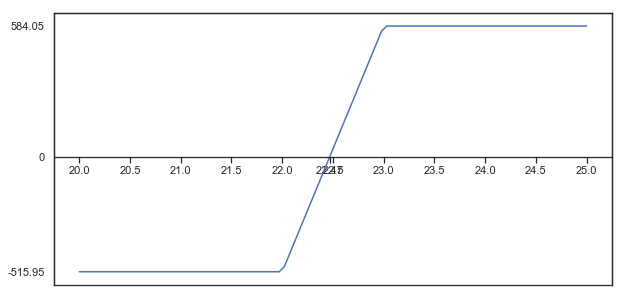


The net debit is: -24715.95 
The max loss is: -515.95 
The max profit is: 584.05 
The breakeven price is: 22.47


In [4]:
collar()

## Covered Call

### Function for plotting Stock Price and P/L

In [ ]:
def pl_plot_cc(curr_stock_price, strk_price, max_profit, net_debit, break_even_price,stock_prop):
    
    net_debit *= -1
    #Creating array of x values (stock prices)
    dx = 100    
    x = np.linspace(curr_stock_price * 0.80, curr_stock_price * 1.2, dx)
    
    #Piecewise function y(x) calculated as 
    y = np.piecewise(x, [x < strk_price,  x >= strk_price], 
                    [lambda x: stock_prop*x + net_debit, max_profit])
    
    #Creating array of xtick labels 
    start = round(curr_stock_price * 0.80, 2)
    stop = round(curr_stock_price * 1.2, 2)
    step = 1 
    x_list = []

    while start <= stop: 
        x_list.append(start)
        start = round(start + step,1)
    x_list.append(round(break_even_price,2))
    
    #Creating figure of the plot
    fig = plt.figure(figsize = (10,5))
    
    #Making axis a subplot and moving it to the 0 position
    ax = fig.add_subplot(1, 1, 1)
    ax.spines['bottom'].set_position('zero')
    
    #Setting y_axis limit`
    ax.set_ylim([-1.1*max_profit, max_profit*1.10])

    
    #Labelling and creating xticks
    plt.xticks(x_list,x_list)
    
    #Labelling and creating yticks
    plt.yticks([0, -1.1*max_profit, max_profit], [0, round(-1.1*max_profit,2), round(max_profit,2)])
    
    #Plotting x,y 
    plt.plot(x,y)
    
    #Creating axis to replace the moved one from the bottom
    ax2 = ax.twiny()
    ax2.set_xticks([])
    
    #Displaying plot
    plt.show()

### Function for Covered Call

In [ ]:
#In this strategy we BUY 100 shares of stock and SELL one OTM CALL
def covered_call():
    curr_stock_price = float(input("What is the current share price? "))
    strk_price = float(input("What is the strike price of the short call? "))
    bid_call_price = float(input("What is the BID price of the short call? "))
    amt_options = float(input("How many options are you buying? "))
#    TEST VALUES
#    curr_stock_price, strk_price, bid_call_price, amt_options, confirmation = 24.76, 25.00, 0.02, 10, "Y"
    stock_prop = amt_options*100
    
    break_even_price = curr_stock_price - bid_call_price
    net_debit = (curr_stock_price - bid_call_price) * stock_prop + 9.95
    max_profit = strk_price*stock_prop - net_debit

    pl_plot_cc(curr_stock_price, strk_price, max_profit, net_debit, break_even_price,stock_prop)        
        
    print("The break even price is: "+str(break_even_price))
    print("The net debit is: "+str(-net_debit)) 
    print("The max loss is: "+str(-net_debit))
    print("The max profit is: "+str(max_profit))

### Covered Call Calculator

In [ ]:
covered_call()